# EE460J Lab 4

# Lab Group Members: Tatsushi Matsumoto, Nick Taylor, Matthew Withey

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from sklearn.datasets import fetch_openml

## Problem 1

In [2]:
cifar = fetch_openml('CIFAR_10_Small')
cifar.data

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3062,a3063,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071
0,59.0,43.0,50.0,68.0,98.0,119.0,139.0,145.0,149.0,149.0,...,59.0,58.0,65.0,59.0,46.0,57.0,104.0,140.0,84.0,72.0
1,154.0,126.0,105.0,102.0,125.0,155.0,172.0,180.0,142.0,111.0,...,22.0,42.0,67.0,101.0,122.0,133.0,136.0,139.0,142.0,144.0
2,255.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,...,78.0,83.0,80.0,69.0,66.0,72.0,79.0,83.0,83.0,84.0
3,28.0,37.0,38.0,42.0,44.0,40.0,40.0,24.0,32.0,43.0,...,53.0,39.0,59.0,42.0,44.0,48.0,38.0,28.0,37.0,46.0
4,170.0,168.0,177.0,183.0,181.0,177.0,181.0,184.0,189.0,189.0,...,92.0,88.0,85.0,82.0,83.0,79.0,78.0,82.0,78.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,76.0,76.0,77.0,76.0,75.0,76.0,76.0,76.0,76.0,78.0,...,228.0,185.0,177.0,223.0,239.0,239.0,235.0,236.0,234.0,236.0
19996,81.0,91.0,98.0,106.0,108.0,110.0,80.0,84.0,88.0,90.0,...,126.0,107.0,143.0,155.0,156.0,160.0,173.0,129.0,147.0,160.0
19997,20.0,19.0,15.0,15.0,14.0,13.0,12.0,11.0,10.0,9.0,...,114.0,112.0,68.0,50.0,52.0,52.0,51.0,50.0,53.0,47.0
19998,25.0,15.0,23.0,17.0,23.0,51.0,74.0,91.0,114.0,137.0,...,87.0,84.0,83.0,84.0,79.0,78.0,78.0,80.0,81.0,80.0


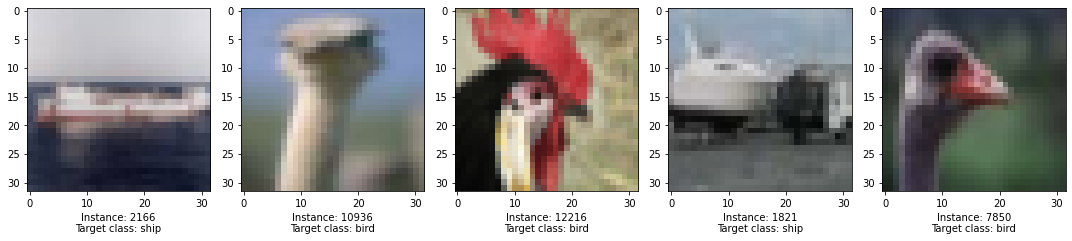

In [3]:
# prints five random images from cifar_10_small
def print_five_images():
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    plt.figure(figsize=(15,10))
    for i in range(5):
        index = random.randint(0, 20000)
        im = cifar.data.loc[index,:]
        im = np.array(im).astype(int)
        im = np.reshape(im, (3, 32, 32))
        im = im.T
        im = np.fliplr(im)
        im = np.rot90(im)
        plt.subplot(1,5, i+1)
        plt.xlabel('Instance: ' + str(index) + '\nTarget class: ' + classes[int(cifar.target.loc[index])])
        plt.imshow(im)
    plt.tight_layout()
    plt.show()

print_five_images()

In [4]:
train_img, test_img, train_lbl, test_lbl = TTS(cifar.data, cifar.target, test_size=0.25, random_state=0)
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(15000, 3072)
(15000,)
(5000, 3072)
(5000,)


## Logistic Regression, L1

In [5]:
def find_best_C_and_Accuracy_L1():
    C_values = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
    grid = dict(C =C_values, multi_class=['multinomial'], solver=['saga'], tol=[0.1], penalty=['l1'], verbose=[1])
    cv = KFold(n_splits=4)
    clf = LR()
    grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv)
    results = grid_search.fit(train_img, train_lbl)
    print('Best for L1 penalty: accuracy of ' + str(np.round(results.best_score_, 5)) + ' using regularization coefficient ' + str(results.best_params_['C']))
    return results

best_L1 = find_best_C_and_Accuracy_L1()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 31 seconds
Best for L1 penalty: accuracy of 0.38653 using regularization coefficient 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.5s finished


In [6]:
L1_scores = pd.DataFrame.from_dict(best_L1.cv_results_)
L1_scores.drop(L1_scores.columns.difference(['param_C', 'mean_test_score']), 1, inplace=True)
L1_scores

C:\Users\mgwit\AppData\Local\Temp/ipykernel_29888/2927872455.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  L1_scores.drop(L1_scores.columns.difference(['param_C', 'mean_test_score']), 1, inplace=True)


,param_C,mean_test_score
0,10000,0.384800
1,1000,0.384333
2,100,0.384600
3,10,0.386533
4,1,0.385800
5,0.1,0.384133
6,0.01,0.385067
7,0.001,0.384400
8,0.0001,0.324733


## Logistic Regression, L2

In [7]:
def find_best_C_and_Accuracy_L2():
    C_values = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
    grid = dict(C =C_values, multi_class=['multinomial'], solver=['saga'], tol=[0.1], penalty=['l2'], verbose=[1])
    cv = KFold(n_splits=4)
    clf = LR()
    grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv)
    results = grid_search.fit(train_img, train_lbl)
    print('Best for L2 penalty: accuracy of ' + str(np.round(results.best_score_, 5)) + ' using regularization coefficient ' + str(results.best_params_['C']))
    return results

best_L2 = find_best_C_and_Accuracy_L2()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5 epochs took 9 seconds
Best for L2 penalty: accuracy of 0.38673 using regularization coefficient 0.0001


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s finished


In [8]:
L2_scores = pd.DataFrame.from_dict(best_L2.cv_results_)
L2_scores.drop(L2_scores.columns.difference(['param_C', 'mean_test_score']), 1, inplace=True)
L2_scores

C:\Users\mgwit\AppData\Local\Temp/ipykernel_29888/2948191753.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  L2_scores.drop(L2_scores.columns.difference(['param_C', 'mean_test_score']), 1, inplace=True)


,param_C,mean_test_score
0,10000,0.384867
1,1000,0.382800
2,100,0.385200
3,10,0.384067
4,1,0.385533
5,0.1,0.382867
6,0.01,0.384933
7,0.001,0.384400
8,0.0001,0.386733


In [9]:
def get_loss():
    loss = np.zeros((20000, 2))
    prob_L1 = best_L1.predict_proba(cifar.data)
    prob_L2 = best_L2.predict_proba(cifar.data)
    y = cifar.target
    for i in range(20000):
        loss[i][0] = -1*np.log2(prob_L1[i, int(y[i])])
        loss[i][1] = -1*np.log2(prob_L2[i, int(y[i])])
    
    return pd.DataFrame(loss, columns=['Loss L1', 'Loss L2'])

loss = get_loss()
loss

,Loss L1,Loss L2
0,1.256518,1.319383
1,4.885300,4.741637
2,0.824077,0.864509
3,3.114602,3.068512
4,3.222210,3.446920
...,...,...
19995,2.386389,2.404187
19996,2.082095,2.246407
19997,1.900496,1.785703
19998,3.938400,4.046385


In [10]:
def get_non_zeroes(w, threshold):
    count = 0
    for i in range(len(w)):
        if w[i] > threshold :
            count = count + 1
    return count

def show_sparsity():
    sparsity = np.zeros((10,3))
    threshold = [0,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001,0.000000001]
    w_L1 = best_L1.best_estimator_.coef_.ravel()
    w_L2 = best_L2.best_estimator_.coef_.ravel()
    for i in range(10): 
        w_L1_non_zeros = get_non_zeroes(w_L1, threshold[i])
        w_L2_non_zeros = get_non_zeroes(w_L2, threshold[i])
        sparsity[i][0] = threshold[i]
        sparsity[i][1] = 1 - (w_L1_non_zeros/len(w_L1))
        sparsity[i][2] = 1 - (w_L2_non_zeros/len(w_L2))

    sparsity_df = pd.DataFrame(sparsity, columns=['Threshold', 'sparsity of L1', 'sparsity of L2'])
    return sparsity_df

sparsity = show_sparsity()
sparsity

,Threshold,sparsity of L1,sparsity of L2
0,0.000000e+00,0.499447,0.500651
1,1.000000e-01,1.000000,1.000000
2,1.000000e-02,1.000000,1.000000
3,1.000000e-03,1.000000,1.000000
4,1.000000e-04,0.890137,0.902474
5,1.000000e-05,0.548600,0.554232
6,1.000000e-06,0.504199,0.506055
7,1.000000e-07,0.499870,0.501432
8,1.000000e-08,0.499479,0.500684
9,1.000000e-09,0.499447,0.500651


## Problem 4

In [11]:
def tune_random_forest_cifar_10():
    grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'verbose': [1],
    }
    cv = KFold(n_splits=4)
    rf = ensemble.RandomForestClassifier()
    grid_search = RandomizedSearchCV(estimator=rf, param_distributions=grid, n_jobs=-1, cv=cv, verbose=2)
    results = grid_search.fit(train_img, train_lbl)
    print('Best accuracy of random forest is ' + str(np.round(results.best_score_, 5)) + ' using parameters ' + str(results.best_params_))
    return results

best_random_forest_cifar = tune_random_forest_cifar_10()

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best accuracy of random forest is 0.43487 using parameters {'verbose': 1, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.0min finished


In [12]:
def tune_gb_cifar_10():
    grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.5, 1],
        'max_depth': [10, 20, 30],
        'verbose': [3],
    }
    cv = KFold(n_splits=4)
    gb = ensemble.GradientBoostingClassifier()
    grid_search = RandomizedSearchCV(estimator=gb, param_distributions=grid, n_jobs=-1, cv=cv, verbose=2)
    results = grid_search.fit(train_img, train_lbl)
    print('Best accuracy of gradient boosting is ' + str(np.round(results.best_score_, 5)) + ' using parameters ' + str(results.best_params_))
    return results

#best_gb_cifar = tune_gb_cifar_10()

### Gradient Boosting was taking hours to complete and I was not able to produce an accuracy score or best parameters